# Making a trial by trial fit of faceWord dataand using that for searchligth classificiation

This tutorial will load models and data from tutorial 13 and change the design matrix to one that gives a beta estimate for each trial.

In [1]:
# import some functionality
from datetime import datetime

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
import os
import pip
os.system('python3 -m pip install numpy')
os.system('python3 -m pip install matplotlib')
os.system('python3 -m pip install scipy')
os.system('python3 -m pip install panda')
os.system('python3 -m pip install nilearn')
os.system('python3 -m pip install sklearn')
os.system('python3 -m pip install pickle')
os.system('python3 -m pip install atlasreader')
os.system('python3 -m pip install seaborn')

#import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.ndimage import gaussian_filter

%matplotlib inline

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 10:55:03
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2342 sha256=54c433af489d537387a71e1d5f71ca366572158d6522ce93603ce1854d6dfbd0
  Stored in directory: /home/coder/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.8 MB/s eta 0:00:00
  Created wheel for atlasreader: filename=atlasreader-0.1.2-py3-none-any.whl size=12046470 sha256=fb24e62312d2fcf620db0d54aa87752f57708bc8038ae08520e562fdb8966ab7
  Stored in directory: /home/coder/.cache/pip/wheels/87/0b/8b/83185241c4f15a023385b9f8e0821838b1ee56ffa733bdad6c
Successfully built atlasreader



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Finishing cell: 10:55:23


In [ ]:
import pickle

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

# Getting the first level models from tutorial 13:
f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_first_level_our_contrast.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

### Figuring out what is in the models_events variable

In [ ]:
#Number of participants
print(len(models_events))
N=models_events[1][1].shape[0]

print(models_confounds[1][3].shape[0])
print(models[1].t_r)

text = "Number of images: %d, number of trials: %d" % (models_confounds[1][3].shape[0], N)
print(text)

## Creating new design matrices with a column per experimental trial.

In [ ]:
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix
import numpy as np

N_par=len(models_events) # Number of participants
lsa_dm= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    for ii in range(len(models_events[i])):
        #N=number of events
        N=models_events[i][ii].shape[0]
        #Number of images per session (determined by number of rows in confounding variable)
        N_img=models_confounds[i][ii].shape[0]
        #duration of scan
        dur=N_img*models[i].t_r # duration of run
        # Vector of timepoints duratoin and number of images 
        t_fmri = np.linspace(0, dur,N_img,endpoint=False)
        # We have to create a dataframe with onsets/durations/trial_types
        # No need for modulation!
        trials = pd.DataFrame(models_events[i][ii], columns=['onset'])
        trials.loc[:, 'duration'] = 0.7
        trials.loc[:, 'trial_type'] = ['t_'+str(iii).zfill(3) + '_' + models_events[i][ii]['trial_type'][iii-1]  for iii in range(1, N+1)]

        # lsa_dm = least squares all design matrix
        lsa_dm[i].append(make_first_level_design_matrix(
            frame_times=t_fmri,  # we defined this earlier 
            events=trials,
            add_regs=models_confounds[i][ii], #Add the confounds from fmriprep
            hrf_model='glover',
            drift_model='cosine'  
        ))
    




now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Plot selected design matrices

In [ ]:
from nilearn.plotting import plot_design_matrix
#Plotting participant 22
for ii in range(len(models_events[21])):
    plot_design_matrix(lsa_dm[21][ii]);

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

### Let's inspect the correlational structure of the design matrix

In [ ]:
import seaborn as sns
#Again from participant 22
dm_corr=lsa_dm[21][0].corr()
p1 = sns.heatmap(dm_corr)

## Fit the models for all sessions from one participant

In [ ]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

from nilearn.glm.first_level import FirstLevelModel

N_par=len(models_events) # Number of participants
models_trials_all= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    #models_trials_all[i]= np.empty((len(models_events[i]), 0)).tolist()
    for ii in range(len(models_events[i])):
    
        # Get data and model info for 1st participant, 1st session
        imgs_trials=models_run_imgs[i][ii]
        models_trials_all[i].append (FirstLevelModel())
        #Fit the model
        text = "Fitting GLM for participant %d, session %d" % (i+1, ii+1)
        print(text)
        models_trials_all[i][ii].fit(imgs_trials,design_matrices=lsa_dm[i][ii])


import pickle

# Saving the objects:
f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_first_level_models_all_trials_all_par.pkl', 'wb')
pickle.dump([models_trials_all, lsa_dm], f)
f.close()
        
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Saving/retrieving the fitted models and design matrices

## Making z-map contrasts from the fitted model to use in later analyses

In [ ]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))


N_par=len(models_events) # Number of participants
z_maps_all= np.empty((N_par, 0)).tolist()
conditions_label_all= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    for ii in range(len(models_events[i])):
        text = "Making contrasts for participant %d , session %d" % (i+1, ii+1)
        print(text)
        N=models_events[i][ii].shape[0]
        #Make an identity matrix with N= number of trials
        contrasts=np.eye(N)
        
        #Find difference between columns in design matrix and number of trials
        dif=lsa_dm[i][ii].shape[1]-contrasts.shape[1]
        
        #Pad with zeros
        contrasts=np.pad(contrasts, ((0,0),(0,dif)),'constant')
        print(contrasts.shape)
        for iii in range(N):
            #Add a z-contrast image from each trial
            z_maps_all[i].append(models_trials_all[i][ii].compute_contrast(contrasts[iii,], output_type='z_score'))
            # Make a variable with condition labels for use in later classification
            conditions_label_all[i].append(models_events[i][ii]['trial_type'][iii])

import pickle

#Save the first level models

# Saving the objects:


f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_first_level_models_all_trials_all_par.pkl', 'wb')
pickle.dump([conditions_label_all, z_maps_all], f)
f.close()
            
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [ ]:

f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_first_level_models_all_trials_all_par.pkl', 'wb')
pickle.dump([models_trials_all, lsa_dm, conditions_label_all, z_maps_all], f)
f.close()


## Saving models and z_maps

In [2]:
import pickle

# Getting back the objects:

f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_first_level_models_all_trials_all_par.pkl', 'rb')
models_trials_all, lsa_dm, conditions_label_all, z_maps_all = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/home/coder/.local/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


Finishing cell: 11:05:52


In [3]:
for i in range(len(conditions_label_all)):
    for j in range(len(conditions_label_all[i])):
        if conditions_label_all[i][j] in ['word_neg', 'word_pos', 'word_neu']:
            conditions_label_all[i][j] = 'word'
        else:
            conditions_label_all[i][j] = 'image'

In [4]:
conditions_label_all
len(conditions_label_all[0])
print(conditions_label_all[0])

['image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'image', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'word', 'wo

## Reshape data for classification

In [5]:

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

import numpy as np
#from nilearn import datasets
from nilearn.image import new_img_like, load_img, index_img, clean_img
from sklearn.model_selection import train_test_split, GroupKFold

N_par=22 # Number of participants
z_maps_img_all= np.empty((N_par, 0)).tolist()
z_maps_conc= np.empty((N_par, 0)).tolist()
conditions= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    n_trials=len(conditions_label_all[i]) # 720
    text = "Reshaping participant %d\n" % (i+1)
    print(text)


    # Reshaping data------------------------------
    from nilearn.image import index_img, concat_imgs
    idx_img=[int(iii) for iii in range(len(conditions_label_all[i])) if conditions_label_all[i][iii] == 'image']
    idx_word=[int(iii) for iii in range(len(conditions_label_all[i])) if conditions_label_all[i][iii] == "word"]
    # iii goes from 0 to 719.
    # let's see what idx_img and idx_word look like.

    #Concatenate trials
    idx=np.concatenate((idx_img, idx_word))

    conditions[i]=np.array(conditions_label_all[i])[idx]
    z_maps_conc[i]=concat_imgs(z_maps_all[i])
    print(z_maps_conc[i].shape)
    z_maps_img_all[i] = index_img(z_maps_conc[i], idx)

    print(z_maps_img_all[i].shape)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 11:06:08
Reshaping participant 1

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 2

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 3

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 4

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 5

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 6

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 7

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 8

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 9

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 10

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 11

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 12

(79, 93, 65, 720)
(79, 93, 65, 720)
Reshaping participant 13

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 14

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 15

(78, 92, 65, 720)
(78, 92, 65, 720)
Reshaping participant 16

(78, 92, 65, 720)
(78, 92, 65

## create training and testing vars on the basis of class labels

In [6]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

N_par= 22 # Number of participants
idx1= np.empty((N_par, 0)).tolist()
idx2= np.empty((N_par, 0)).tolist()
conditions1= np.empty((N_par, 0)).tolist()
conditions2= np.empty((N_par, 0)).tolist()
fmri_img1= np.empty((N_par, 0)).tolist()
fmri_img2= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    text = "Creating trian/test data for participant %d\n" % (i+1)
    print(text)
    idx2[i]=np.arange(conditions[i].shape[0])
    # create training and testing vars on the basis of class labels
    idx1[i],idx2[i], conditions1[i],  conditions2[i] = train_test_split(idx2[i],conditions[i], test_size=0.2)
    
    # Reshaping data------------------------------
    from nilearn.image import index_img
    fmri_img1[i] = index_img(z_maps_img_all[i], idx1[i]) # Training data
    fmri_img2[i] = index_img(z_maps_img_all[i], idx2[i]) # Test data!

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 11:07:34
Creating trian/test data for participant 1

Creating trian/test data for participant 2

Creating trian/test data for participant 3

Creating trian/test data for participant 4

Creating trian/test data for participant 5

Creating trian/test data for participant 6

Creating trian/test data for participant 7

Creating trian/test data for participant 8

Creating trian/test data for participant 9

Creating trian/test data for participant 10

Creating trian/test data for participant 11

Creating trian/test data for participant 12

Creating trian/test data for participant 13

Creating trian/test data for participant 14

Creating trian/test data for participant 15

Creating trian/test data for participant 16

Creating trian/test data for participant 17

Creating trian/test data for participant 18

Creating trian/test data for participant 19

Creating trian/test data for participant 20

Creating trian/test data for participant 21

Creating trian/test data for participant

In [7]:
## Saving training and test data!

# import pickle

f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_train_test.pkl', 'wb')
pickle.dump([fmri_img1, fmri_img2, conditions1, conditions2], f)
f.close()

In [8]:


# Getting back the objects:

f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_train_test.pkl', 'rb')
fmri_img1, fmri_img2, conditions1, conditions2 = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))



Finishing cell: 11:09:31


<class 'nibabel.nifti1.Nifti1Image'>
3519


/home/coder/.local/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


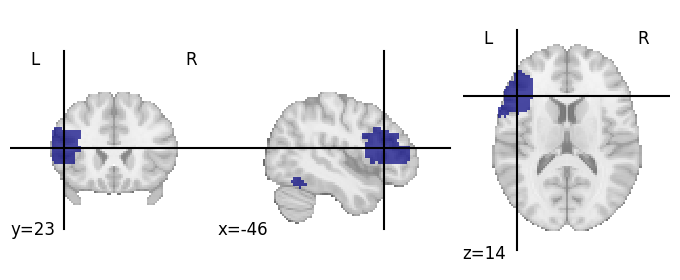

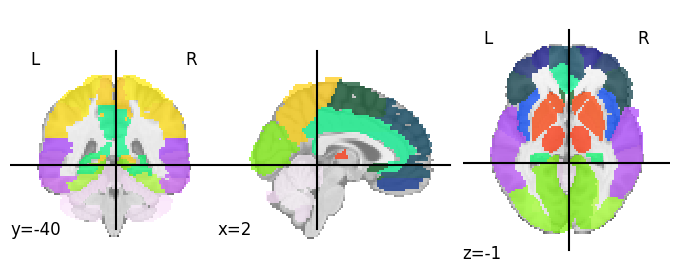

In [9]:
### Create mask

# Getting back the objects:
f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_first_level_our_contrast.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()
import nibabel as nib
test_img = nib.load(models_run_imgs[1][1])

import nilearn
from nilearn import plotting
atlas_name = "SPM12"

atlas = nilearn.datasets.fetch_atlas_aal(atlas_name, data_dir="/work/fMRI Assignment/neuro_exam/atlases", resume=True, verbose=1)

# atlas_name = "maxprob-thr50-2mm"

# atlas = nilearn.datasets.fetch_atlas_juelich(atlas_name, data_dir="/work/fMRI Assignment/neuro_exam/atlases", symmetric_split=False, resume=True, verbose=1)

# PREPARING ATLAS
atlas_img = nib.load(atlas["maps"])
print(type(atlas_img))
# Get labels
labels = atlas.labels
atlas_data = atlas_img.get_fdata()

from nilearn.image import resample_img as resample

target_affine = test_img.affine

shape = test_img.shape
target_shape = [shape[0], shape[1], shape[2]]

resampled_atlas =resample(atlas_img,target_affine = target_affine, target_shape = target_shape, interpolation = 'nearest')

resamp_data = resampled_atlas.get_fdata()

mask = resamp_data.copy()


x = resamp_data.shape[0]
y = resamp_data.shape[1]
z = resamp_data.shape[2]

# This will set all elements of atlas_data to either 0 or 1.
m = 0
for i in range(0, x):
    for j in range(0, y):
        for k in range(0, z):
            if resamp_data[i][j][k] in [2301,2311,5401,5402]:
                m += 1
                mask[i][j][k] = 1
            else:
                mask[i][j][k] = 0
print(m)

mask_nifti = nib.Nifti1Image(mask, affine = target_affine)
plotting.plot_roi(mask_nifti)
plotting.plot_roi(atlas_img)



nib.save(mask_nifti, 'mask.nii')


In [10]:
np.sum(mask_nifti.get_fdata())

3519.0

In [11]:
## Train model
from nilearn.input_data import NiftiMasker
from nilearn.decoding import SearchLight
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB as nb
masker = NiftiMasker(mask_img=mask_nifti, standardize=False)

fmri_masked_train = []
fmri_masked_test = []

# We use masker to retrieve a 2D array ready
# for machine learning with scikit-learn
N_par = 22
for i in range(N_par):
    a = masker.fit_transform(fmri_img1[i])
    b = masker.fit_transform(fmri_img2[i])
    fmri_masked_train.append(a)
    fmri_masked_test.append(b)
    
#Print size of matrix (images x voxels)
# print(fmri_masked.shape)

/home/coder/.local/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


(12576,)

In [15]:


f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_classification_final.pkl', 'wb')
pickle.dump([fmri_masked_train, fmri_masked_test, conditions1, conditions2], f)
f.close()
        

In [16]:


# Getting back the objects:

f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_classification_final.pkl', 'rb')
fmri_masked_train, fmri_masked_test, conditions1, conditions2 = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 11:21:53


In [17]:
cons = np.hstack(conditions1)
# b = np.vstack(conditions1[18:])
# cons = np.vstack([a,b])
# cons.shape
cons.shape

lin_clf = LinearSVC(penalty = "l2")


#fmri_masked_train[19].shape

a = np.vstack(fmri_masked_train)
a.shape


lin_clf = lin_clf.fit(a, cons)


/home/coder/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:



from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lin_clf, fmri_masked_test[1], conditions2[1])
print(cv_score)
print('Mean prediction score:')
print(np.mean(cv_score))

[0.79310345 0.75862069 0.75862069 0.72413793 0.67857143]
Mean prediction score:
0.7426108374384237


### Perform a permutation test

In [20]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

from sklearn.model_selection import permutation_test_score


score = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
permutation_scores = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pvalue = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(N_par):
    
    #masker = NiftiMasker(mask_img=process_mask2_img[i], standardize=False)
    # We use masker to retrieve a 2D array ready
    # for machine learning with scikit-learn
    #fmri_masked = masker.fit_transform(fmri_img2[i])
    #Print size of matrix (images x voxels)
    
    score[i], permutation_scores[i], pvalue[i]= permutation_test_score(
        lin_clf, fmri_masked_test[i], conditions2[i], cv=10, n_permutations=1000, 
        n_jobs=-1, random_state=0, verbose=0, scoring=None)
    print("Classification Accuracy for participant %d: %s (pvalue : %s)" % (i,score, pvalue))

Starting cell: 11:28:13
Classification Accuracy for participant 0: [0.6657142857142857, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] (pvalue : [0.000999000999000999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Classification Accuracy for participant 1: [0.6657142857142857, 0.7347619047619048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] (pvalue : [0.000999000999000999, 0.000999000999000999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Classification Accuracy for participant 2: [0.6657142857142857, 0.7347619047619048, 0.7914285714285715, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] (pvalue : [0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Classification Accuracy for participant 3: [0.6657142857142857, 0.7347619047619048, 0.7914285714285715, 0.7871428571428571, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] (pvalue : [0.00099

FileNotFoundError: [Errno 2] No such file or directory: '/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_classification_scores.pkl'

In [26]:
# Saving the objects:
f = open('/work/fMRI Assignment/neuro_exam/src/fMRI_data_analyzed/WordFace_classification_scores.pkl', 'wb')
pickle.dump([score,permutation_scores,pvalue], f)
f.close()


now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 11:37:35


### View a histogram of permutation scores

2


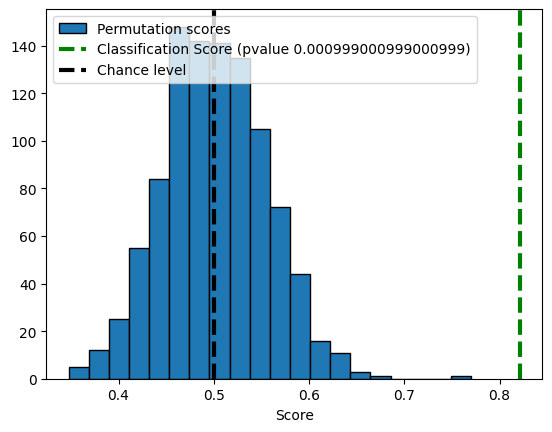

In [38]:
import numpy as np
import matplotlib.pyplot as plt
#How many classes
n_classes = len(set(conditions2[0]))
print(n_classes) # 2

plt.hist(permutation_scores[20], 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score[20]], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue[20])
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')


plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

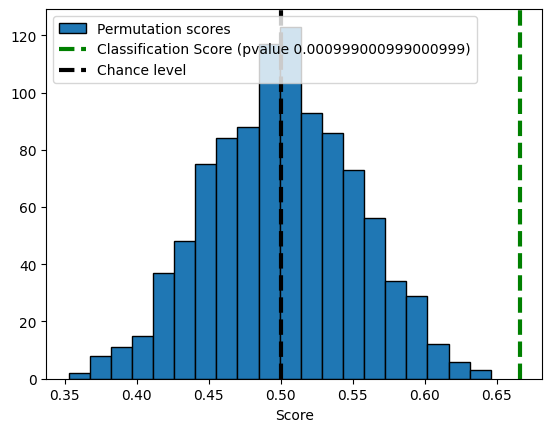

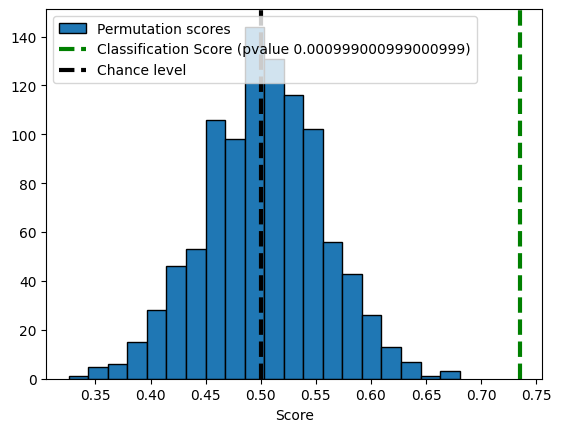

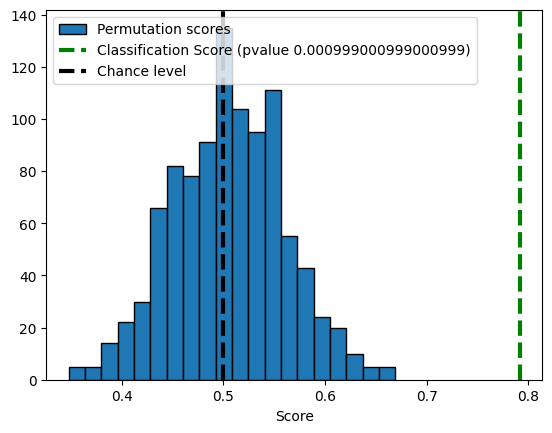

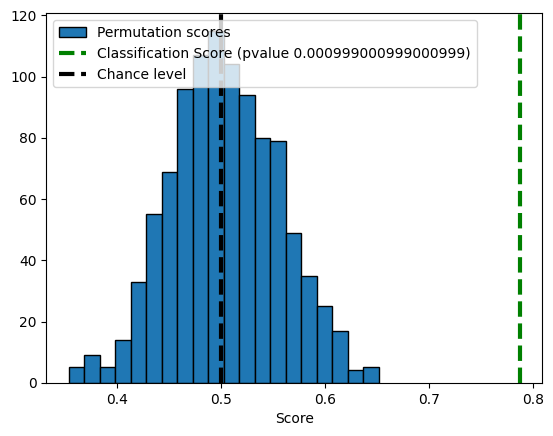

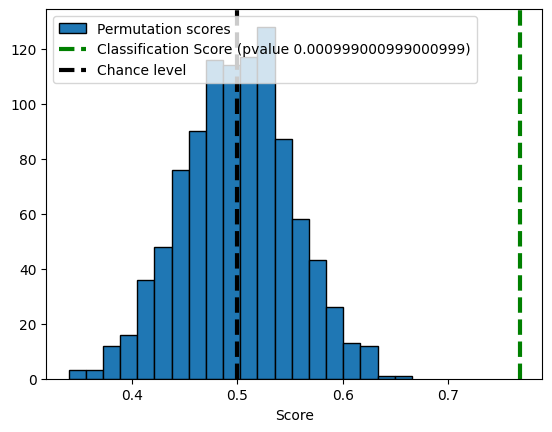

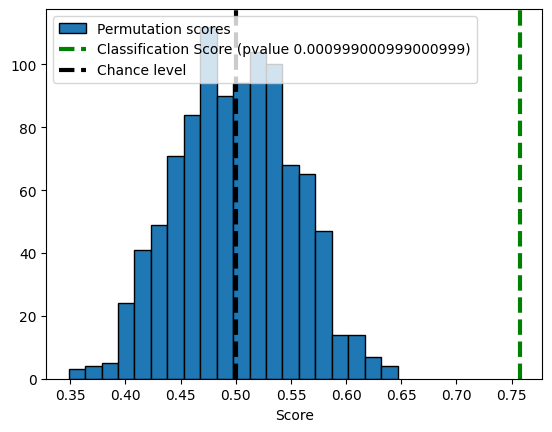

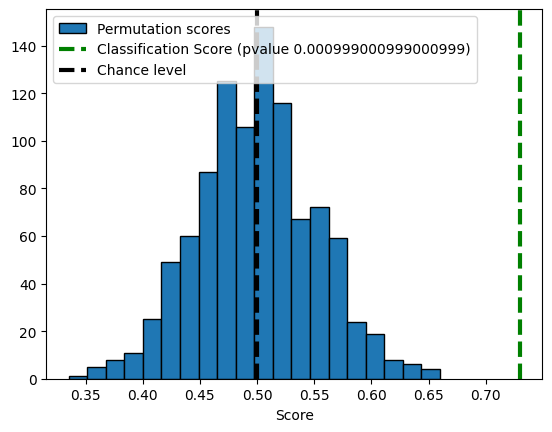

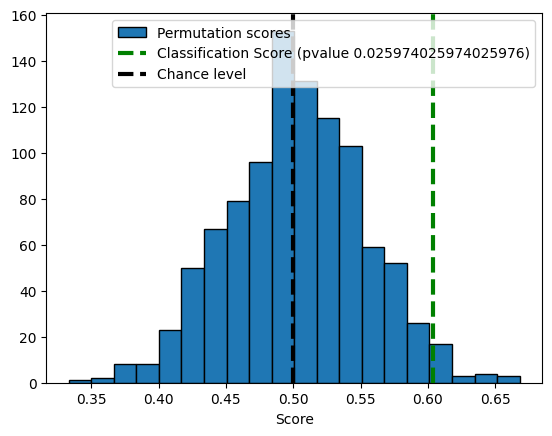

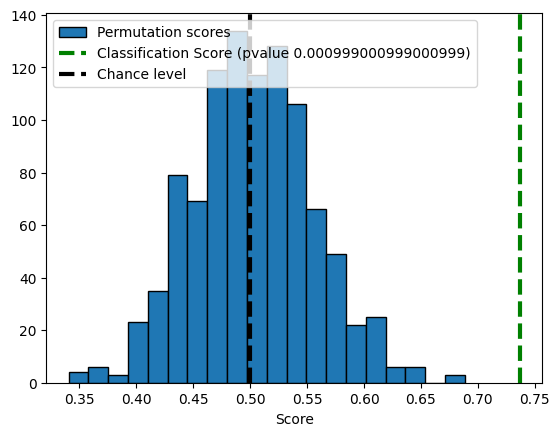

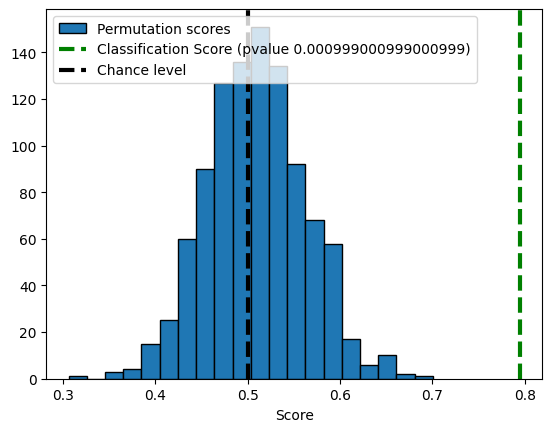

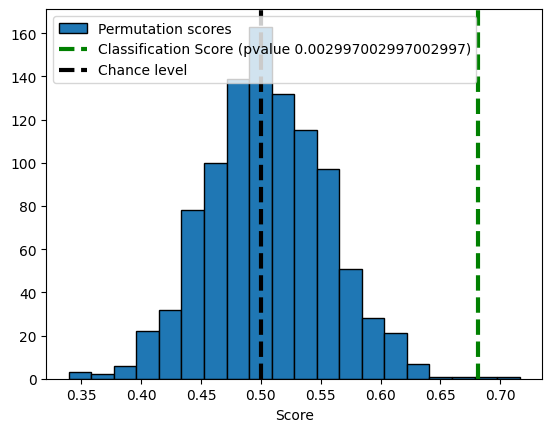

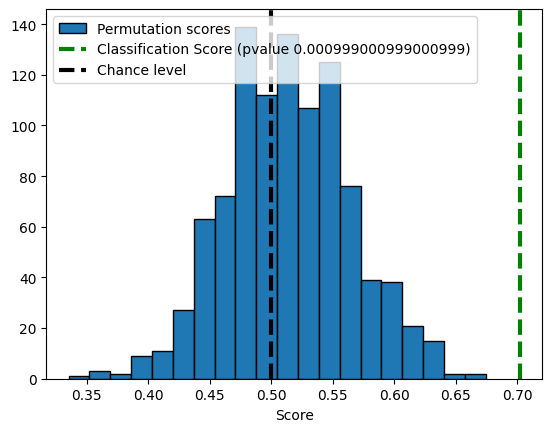

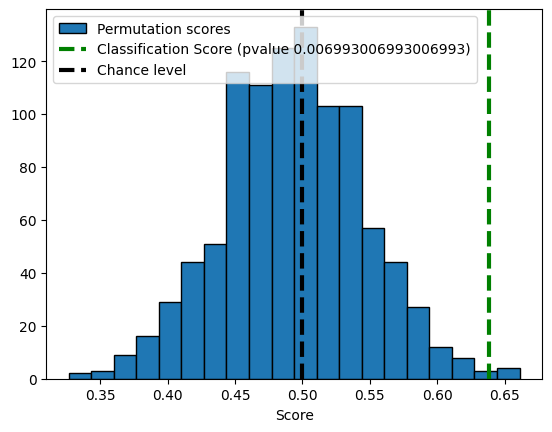

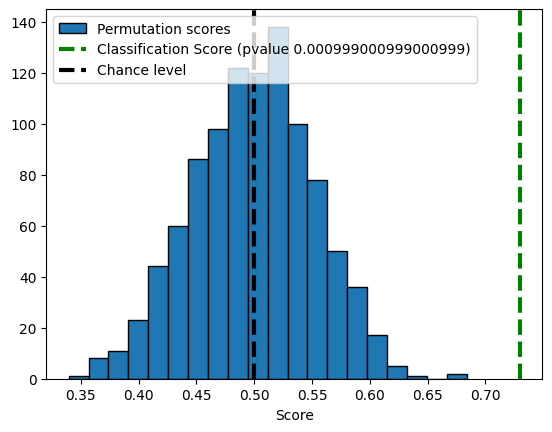

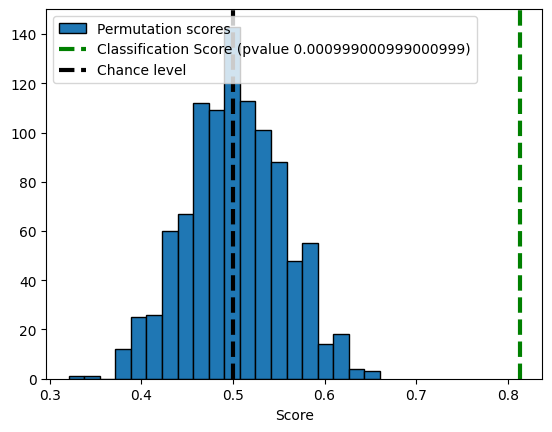

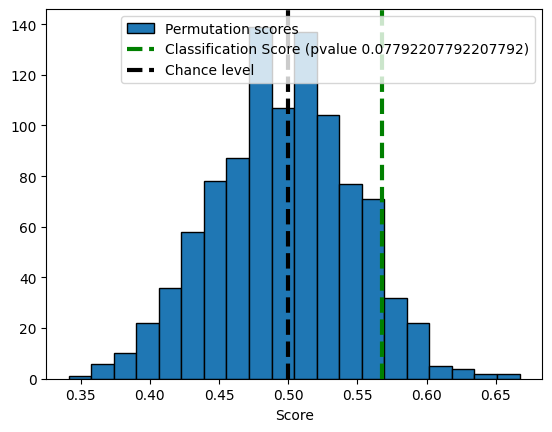

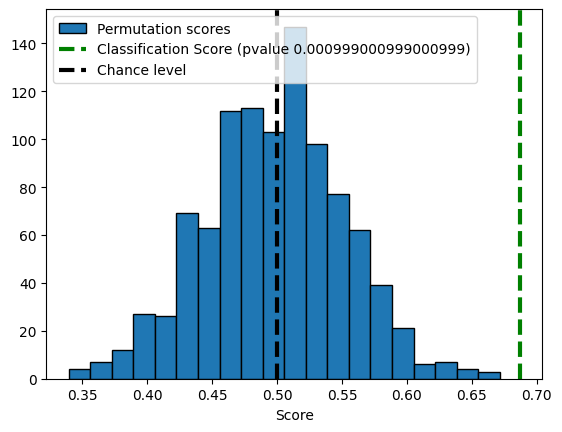

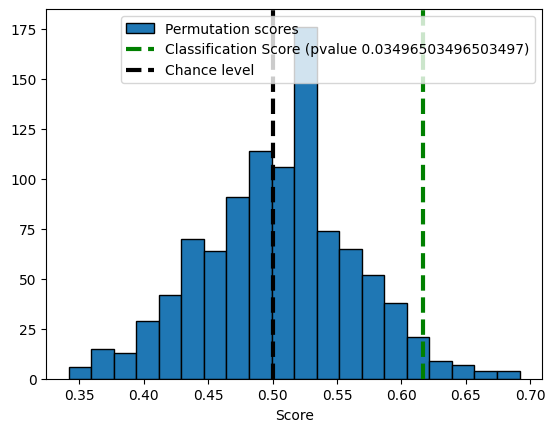

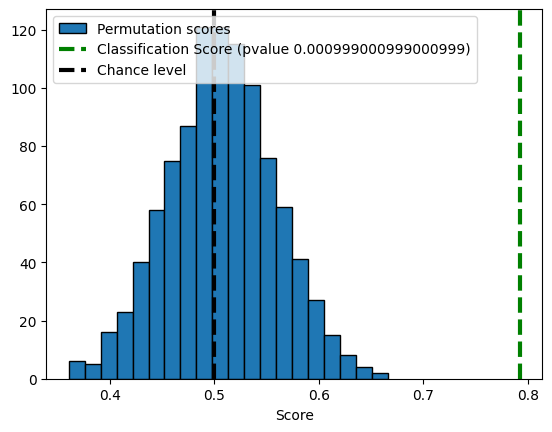

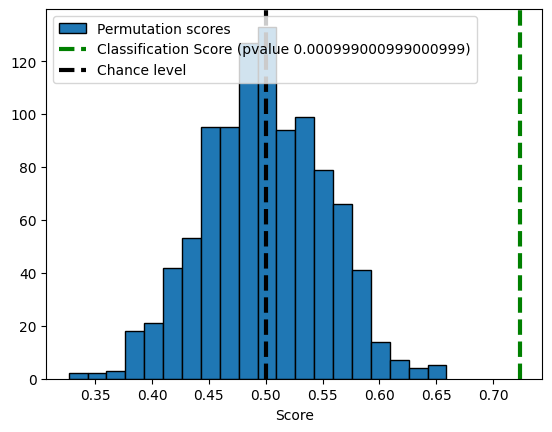

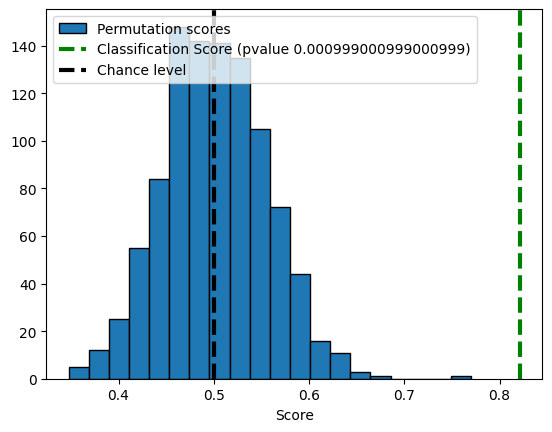

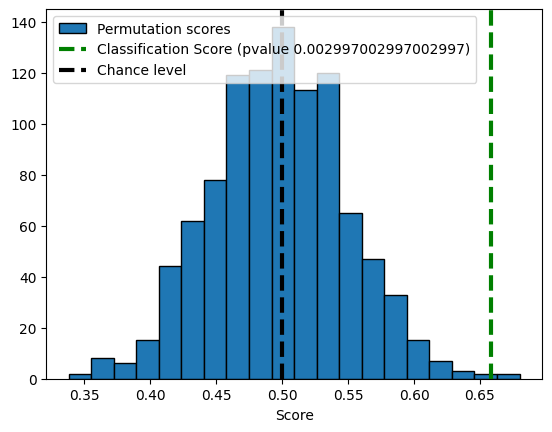

In [39]:
for i in range(22):
    plt.hist(permutation_scores[i], 20, label='Permutation scores',
         edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [score[i]], ylim, '--g', linewidth=3,
            label='Classification Score'
            ' (pvalue %s)' % pvalue[i])
    plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')

   
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Score')
    plt.show()

